Test CAMB

In [77]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
#Find local CAMB installation:
_camb_path = os.path.join(os.path.abspath('..'),'CAMB/CAMB')
sys.path.insert(0, _camb_path)
import camb

print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.4 installed at /home/git/AstroCosmoComputational/Students/Gabriele_Russo/CAMB/CAMB/camb


In [78]:
# set up parameters:
# setting up my fiducial cosmology 
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

# I can change parameters
pars1 = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0.1, tau=0.06,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

In [79]:
# prints all the parameters you can use with this function
pars

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 3150
 max_l_tensor = 600
 max_eta_k = 7875.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.022
 omch2 = 0.122
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.5
 TCMB = 2.7255
 YHe = 0.24569492503497048
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.965
   nrun =

In [80]:
#calculate results for these parameters
results  = camb.get_results(pars)
results1 = camb.get_results(pars1)

**Background Cosmology:**

Text(0.5, 1.0, 'Angular Diameter Distances')

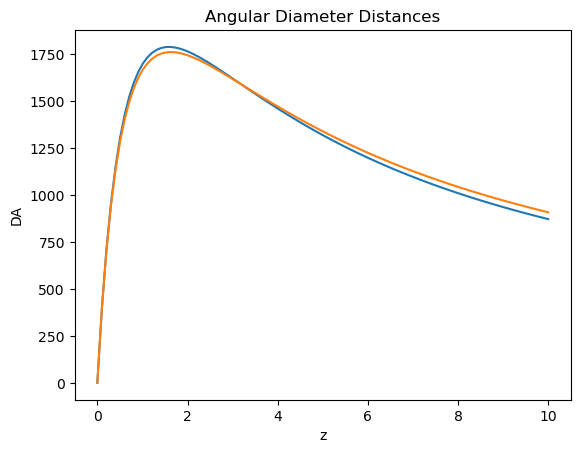

In [81]:
#Distances:
z = np.linspace(0, 10, 100)
DA = results.angular_diameter_distance(z)
DA1 = results1.angular_diameter_distance(z)
plt.plot(z, DA)
plt.plot(z, DA1)
#insert label
plt.xlabel('z')
plt.ylabel('DA')
plt.title('Angular Diameter Distances')

In [82]:
a = np.logspace(-6, 0, 100) #grid spaced in log
densities  = results.get_background_densities(a) 
densities1 = results1.get_background_densities(a)

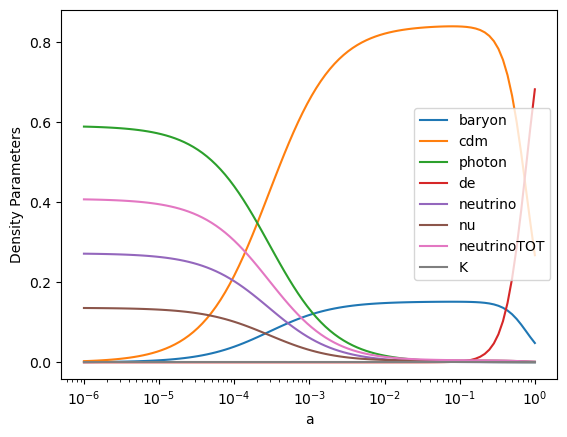

In [83]:
plt.plot(a, densities['baryon']/densities['tot'], label='baryon')
plt.plot(a, densities['cdm']/densities['tot'], label='cdm')
plt.plot(a, densities['photon']/densities['tot'], label='photon')
plt.plot(a, densities['de']/densities['tot'], label='de')
plt.plot(a, densities['neutrino']/densities['tot'], label='neutrino')
plt.plot(a, densities['nu']/densities['tot'], label='nu')
#plt.plot(a, densities['nu']/densities['tot'], label='nu') sommare neutrino con nu perchè sono varie famiglie di neutrini
plt.plot(a, (densities['neutrino']+densities['nu'])/densities['tot'], label='neutrinoTOT')
plt.plot(a, densities['K']/densities['tot'], label='K') # curvature
plt.legend()
plt.xlabel('a')
plt.ylabel('Density Parameters')
plt.xscale('log')

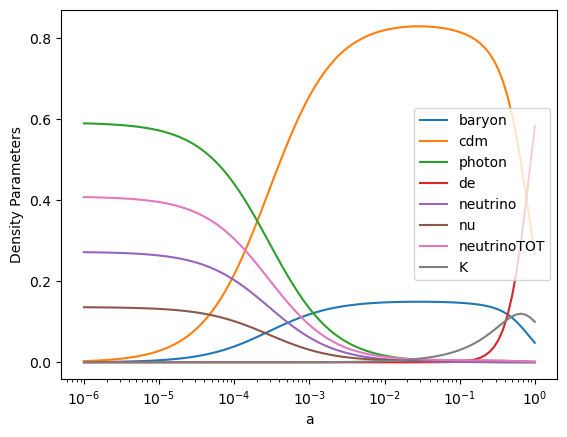

In [84]:
plt.plot(a, densities1['baryon']/densities1['tot'], label='baryon')
plt.plot(a, densities1['cdm']/densities1['tot'], label='cdm')
plt.plot(a, densities1['photon']/densities1['tot'], label='photon')
plt.plot(a, densities1['de']/densities1['tot'], label='de')
plt.plot(a, densities1['neutrino']/densities1['tot'], label='neutrino')
plt.plot(a, densities1['nu']/densities1['tot'], label='nu')
#plt.plot(a, densities1['nu']/densities['tot'], label='nu') sommare neutrino con nu perchè sono varie famiglie di neutrini
plt.plot(a, (densities1['neutrino']+densities1['nu'])/densities1['tot'], label='neutrinoTOT')
plt.plot(a, densities1['K']/densities1['tot'], label='K') #curvature
plt.legend()
plt.xlabel('a')
plt.ylabel('Density Parameters')
plt.xscale('log')

In [85]:
#Compattare i due grafici in uno

**Thermodynamics:**

In [86]:
# Calcolare frazione fre electron
a = np.logspace(-6, 0, 100) #grid spaced in log
z = 1/a - 1
background = results.get_background_redshift_evolution(z)


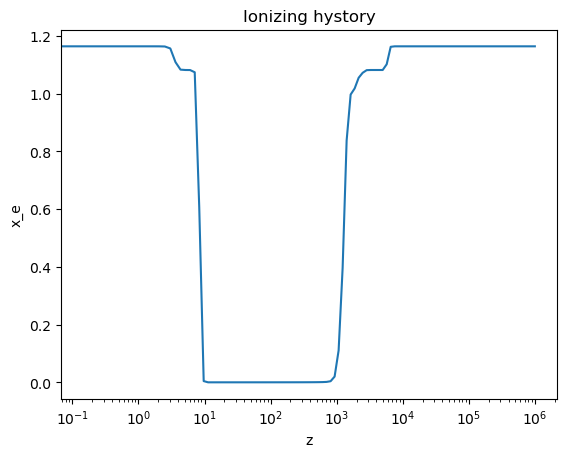

In [87]:
plt.plot(z, background['x_e'])
plt.xlabel('z')
plt.ylabel('x_e')
# riga verticale, unisci grafici
plt.title('Ionizing hystory')
plt.xscale('log')
#plt.yscale('log')
#DIVERSO!!

In [88]:
# I can change parameters
pars1 = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.2,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)
background1 = results1.get_background_redshift_evolution(z)


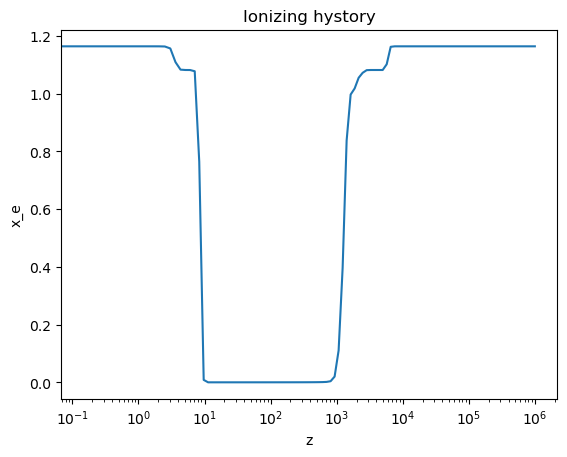

In [89]:
plt.plot(z, background1['x_e'])
plt.xlabel('z')
plt.ylabel('x_e')
#plt.axvline()#riga verticale per x_e 90% ionizzato
plt.title('Ionizing hystory')
plt.xscale('log')
#plt.yscale('log')
#DIVERSO!!

**Perturbations:**
Si devono risolvere E+BOLTZ accoppiate, a mano infinito!!

In [97]:
a = np.logspace(-6, 0, 100) #grid spaced in log
z = 1/a - 1
_vars = ['k/h', 'a', 'H', 'delta_cdm', 'delta_photon', 'delta_neutrino','Weyl']
_time_evolution = results.get_redshift_evolution(0.1, z, vars=_vars)#primo valore è k, Weyl è potenziale di weyl i.e. phi+psi

In [91]:
#find mode enters horizon
#_time_evolution[:,_vars.index]


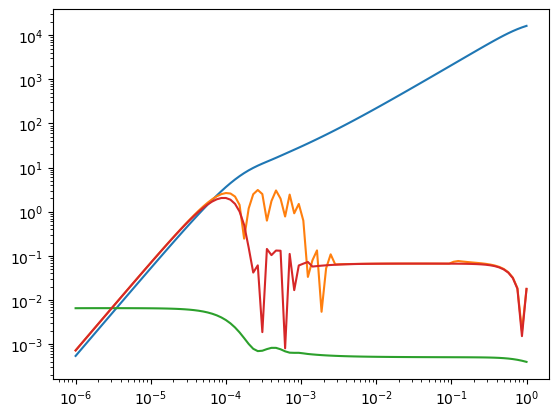

In [98]:
plt.plot(a, np.abs(_time_evolution[:, _vars.index('delta_cdm')]), label='cdm')
plt.plot(a, np.abs(_time_evolution[:, _vars.index('delta_photon')]), label='photon')
plt.plot(a, np.abs(_time_evolution[:, _vars.index('Weyl')]), label='Weyl')
plt.plot(a, np.abs(_time_evolution[:, _vars.index('delta_neutrino')]), label='delta_neutrino')
#plt.axvline(2.e-5, ) #ci va horizon entry!!
plt.xscale('log')
plt.yscale('log')